In [28]:
import pandas as pd

In [2]:
data = pd.read_csv("case_universe.csv")  # Замініть шлях на реальний
data.head()

,Target State,Target COW ID,Start Year,End Year,Uncertain,MID,IMI,MIPS,CRS,ACD
0,FRN,220,1798,1801.0,0,0.0,0.0,0.0,1.0,0.0
1,LIB,620,1801,1805.0,0,0.0,0.0,0.0,1.0,0.0
2,MEX,70,1806,1806.0,0,0.0,0.0,0.0,1.0,0.0
3,"SPN, FRN","220, 230",1806,1810.0,0,0.0,0.0,0.0,1.0,0.0
4,SPN,230,1810,1810.0,0,0.0,0.0,0.0,1.0,0.0


In [3]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Target COW ID    11
End Year         15
MID               4
IMI               4
MIPS              4
CRS              26
ACD               4
dtype: int64


In [4]:
# Для числових колонок — середнім значенням
for col in ['End Year', 'MID', 'IMI', 'MIPS', 'CRS', 'ACD']:
    data[col].fillna(data[col].mean(), inplace=True)

# Для текстових колонок — модою (найчастішим значенням)
data['Target COW ID'].fillna(data['Target COW ID'].mode()[0], inplace=True)


In [5]:
data = pd.get_dummies(data, columns=['Target State', 'Target COW ID'], drop_first=True)


In [6]:
print(data['Uncertain'].value_counts())


Uncertain
0    392
1    177
Name: count, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data.drop("Uncertain", axis=1).select_dtypes(include=["number"])
y = data["Uncertain"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y = data['Uncertain'] 

In [22]:
X = data.drop('Uncertain', axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [24]:
y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [26]:
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.640
Precision: 0.364
Recall: 0.105
F1 Score: 0.163


In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[69  7]
 [34  4]]


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [30]:
y_proba = model.predict_proba(X_test)[:, 1]

In [31]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

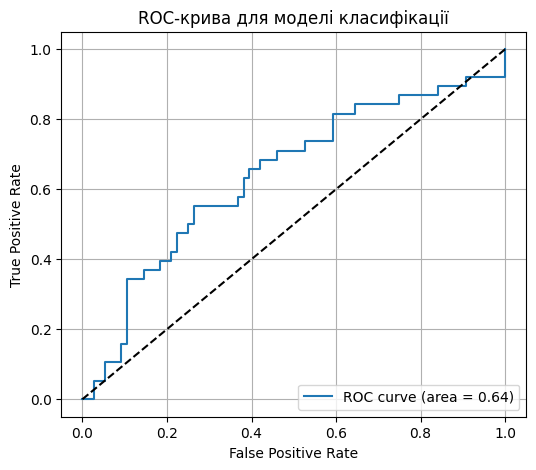

In [32]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Лінія випадковості
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива для моделі класифікації')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")

Random Forest Accuracy: 0.6052631578947368
